# Assignment 5, Question 4: Data Exploration

**Points: 15**

In this notebook, you'll explore the clinical trial dataset using pandas selection and filtering techniques.

You'll use utility functions from `q3_data_utils` where helpful, but also demonstrate direct pandas operations.

## Setup

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, filter_data

# Load the data
df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients with {len(df.columns)} variables")

# Prewritten visualization functions for exploration
def plot_value_counts(series, title, figsize=(10, 6)):
    """
    Create a bar chart of value counts.
    
    Args:
        series: pandas Series with value counts
        title: Chart title
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    series.plot(kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_crosstab(crosstab_data, title, figsize=(10, 6)):
    """
    Create a heatmap of crosstab data.
    
    Args:
        crosstab_data: pandas DataFrame from pd.crosstab()
        title: Chart title
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    plt.imshow(crosstab_data.values, cmap='Blues', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xticks(range(len(crosstab_data.columns)), crosstab_data.columns, rotation=45)
    plt.yticks(range(len(crosstab_data.index)), crosstab_data.index)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients with 18 variables


## Part 1: Basic Exploration (3 points)

Display:
1. Dataset shape
2. Column names and types
3. First 10 rows
4. Summary statistics (.describe())

In [124]:
# TODO: Display dataset info
print(f"Dataset Shape:{df.shape}")
print(df.info())

Dataset Shape:(10000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          10000 non-null  object 
 1   age                 10000 non-null  int64  
 2   sex                 10000 non-null  object 
 3   bmi                 9562 non-null   float64
 4   enrollment_date     10000 non-null  object 
 5   systolic_bp         9586 non-null   float64
 6   diastolic_bp        9586 non-null   float64
 7   cholesterol_total   9446 non-null   float64
 8   cholesterol_hdl     9446 non-null   float64
 9   cholesterol_ldl     9446 non-null   float64
 10  glucose_fasting     9631 non-null   float64
 11  site                10000 non-null  object 
 12  intervention_group  10000 non-null  object 
 13  follow_up_months    10000 non-null  int64  
 14  adverse_events      10000 non-null  int64  
 15  outcome_cvd         10000 no

In [125]:
print(df.head(n=10))

df.describe(include='all')

  patient_id  age         sex   bmi enrollment_date  systolic_bp  \
0     P00001   80           F  29.3      2022-05-01        123.0   
1     P00002   80    Female     NaN      2022-01-06        139.0   
2     P00003   82      Female  -1.0      2023-11-04        123.0   
3     P00004   95      Female  25.4      2022-08-15        116.0   
4     P00005   95           M   NaN      2023-04-17         97.0   
5     P00006   78           F  26.8      2023-08-29        116.0   
6     P00007   84           F  25.4      2022-05-12        133.0   
7     P00008   70        Male  24.7      2022-06-04        111.0   
8     P00009   92      Female  26.9      2022-04-06          NaN   
9     P00010   75        Male  21.1      2023-12-14        128.0   

   diastolic_bp  cholesterol_total  cholesterol_hdl  cholesterol_ldl  \
0          80.0              120.0             55.0             41.0   
1          81.0              206.0             58.0            107.0   
2          86.0              172.0 

,patient_id,age,sex,bmi,enrollment_date,systolic_bp,diastolic_bp,cholesterol_total,cholesterol_hdl,cholesterol_ldl,glucose_fasting,site,intervention_group,follow_up_months,adverse_events,outcome_cvd,adherence_pct,dropout
count,10000,10000.000000,10000,9562.000000,10000,9586.000000,9586.000000,9446.000000,9446.000000,9446.000000,9631.000000,10000,10000,10000.00000,10000.000000,10000,8533.000000,10000
unique,10000,NaN,8,NaN,1666,NaN,NaN,NaN,NaN,NaN,NaN,34,26,NaN,NaN,4,NaN,2
top,P00001,NaN,Female,NaN,2023-06-02,NaN,NaN,NaN,NaN,NaN,NaN,site b,Contrl,NaN,NaN,No,NaN,No
freq,1,NaN,2684,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,742,802,NaN,NaN,4701,NaN,8533
mean,NaN,59.182700,NaN,25.730558,NaN,117.531087,73.550908,178.039488,61.369786,85.698603,96.424255,NaN,NaN,12.25460,0.145500,NaN,60.615610,NaN
std,NaN,151.769963,NaN,5.339547,NaN,13.973973,10.167464,33.129034,11.062101,28.686463,17.112961,NaN,NaN,7.07675,0.393631,NaN,18.974399,NaN
min,NaN,-999.000000,NaN,-1.000000,NaN,75.000000,60.000000,91.000000,25.000000,40.000000,51.000000,NaN,NaN,0.00000,0.000000,NaN,20.000000,NaN
25%,NaN,70.000000,NaN,23.500000,NaN,108.000000,65.000000,155.000000,54.000000,65.000000,84.000000,NaN,NaN,6.00000,0.000000,NaN,47.000000,NaN
50%,NaN,80.000000,NaN,26.000000,NaN,117.000000,73.000000,177.000000,61.000000,84.000000,96.000000,NaN,NaN,12.00000,0.000000,NaN,62.000000,NaN
75%,NaN,92.000000,NaN,28.775000,NaN,127.000000,81.000000,200.000000,69.000000,105.000000,108.000000,NaN,NaN,19.00000,0.000000,NaN,75.000000,NaN


## Part 2: Column Selection (3 points)

Demonstrate different selection methods:

1. Select only numeric columns using `.select_dtypes()`
2. Select specific columns by name
3. Select a subset of rows and columns using `.loc[]`

In [76]:
# TODO: Select numeric columns
df.select_dtypes(include=[np.number])

,age,bmi,systolic_bp,diastolic_bp,cholesterol_total,cholesterol_hdl,cholesterol_ldl,glucose_fasting,follow_up_months,adverse_events,adherence_pct
0,80,29.3,123.0,80.0,120.0,55.0,41.0,118.0,20,0,24.0
1,80,NaN,139.0,81.0,206.0,58.0,107.0,79.0,24,0,77.0
2,82,-1.0,123.0,86.0,172.0,56.0,82.0,77.0,2,0,70.0
3,95,25.4,116.0,77.0,200.0,56.0,104.0,115.0,17,0,62.0
4,95,NaN,97.0,71.0,185.0,78.0,75.0,113.0,9,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,72,23.2,122.0,73.0,182.0,54.0,92.0,97.0,21,0,20.0
9996,100,28.9,124.0,78.0,157.0,56.0,70.0,102.0,11,0,57.0
9997,78,23.8,110.0,63.0,154.0,69.0,71.0,114.0,2,1,77.0
9998,86,27.0,139.0,98.0,196.0,38.0,119.0,126.0,16,0,63.0


In [77]:
# TODO: Select specific columns
df[["age", "bmi", "adherence_pct"]]

,age,bmi,adherence_pct
0,80,29.3,24.0
1,80,NaN,77.0
2,82,-1.0,70.0
3,95,25.4,62.0
4,95,NaN,NaN
...,...,...,...
9995,72,23.2,20.0
9996,100,28.9,57.0
9997,78,23.8,77.0
9998,86,27.0,63.0


In [78]:
# TODO: Use .loc[] to select subset
display(df.loc[0:10, "bmi": 'diastolic_bp'])

,bmi,enrollment_date,systolic_bp,diastolic_bp
0,29.3,2022-05-01,123.0,80.0
1,NaN,2022-01-06,139.0,81.0
2,-1.0,2023-11-04,123.0,86.0
3,25.4,2022-08-15,116.0,77.0
4,NaN,2023-04-17,97.0,71.0
5,26.8,2023-08-29,116.0,66.0
6,25.4,2022-05-12,133.0,100.0
7,24.7,2022-06-04,111.0,72.0
8,26.9,2022-04-06,NaN,NaN
9,21.1,2023-12-14,128.0,76.0


## Part 3: Filtering (4 points)

Filter the data to answer these questions:

1. How many patients are over 65 years old?
2. How many patients have systolic BP > 140?
3. Find patients who are both over 65 AND have systolic BP > 140
4. Find patients from Site A or Site B using `.isin()`

In [82]:
# TODO: Filter and count patients over 65
# 1. Use the filter_data utility from Q3
# 2. Create a filter for age > 65
# 3. Apply the filter and count the results

filter_over65 = [{'column': 'age', 'condition': 'greater_than', 'value': 65}]
print(type(df))
patients_over_65 = filter_data(df = df, filters= filter_over65) 

print(f"Patients over 65: {len(patients_over_65)}")


<class 'pandas.core.frame.DataFrame'>
Patients over 65: 8326


In [83]:
# TODO: Filter for high BP
# 1. Use the filter_data utility from Q3
# 2. Create a filter for systolic_bp > 140
# 3. Apply the filter and count the results
filter_BP = [{'column': 'systolic_bp', 'condition': 'greater_than', 'value': 140}]
high_bp = filter_data(df = df, filters= filter_BP) 


print(f"Patients with high BP: {len(high_bp)}")


Patients with high BP: 538


In [87]:
# TODO: Multiple conditions with &
# 1. Use filter_data for multiple conditions:
# 2. Create filters for both conditions:
#     {'column': 'age', 'condition': 'greater_than', 'value': 65},
#     {'column': 'systolic_bp', 'condition': 'greater_than', 'value': 140}
# ]
# 3. Apply the filter and count the results
# print(f"Patients over 65 AND high BP: {len(both_conditions)}")
#
# 5. Alternative: Use in_range for age range:
# 5. Create filter for age range 65-100
# 6. Apply the filter and count the results

filter_age65_BP140 = filter_BP + filter_over65
both_conditions = filter_data(df = df, filters= filter_age65_BP140) 
print(f"Patients over 65 AND high BP: {len(both_conditions)}")

Patients over 65 AND high BP: 464


In [88]:
# TODO: Filter by site using .isin()
# 1. Use the filter_data utility from Q3
# 2. Create a filter for Site A or Site B
# 3. Apply the filter and count the results
# print(f"Patients from Site A or B: {len(site_ab)}")

filter_siteAB = [{'column': 'site', 'condition': 'in_list', 'value': ['Site A', 'Site B']}]
site_ab = filter_data(df = df, filters= filter_age65_BP140) 
print(f"Patients from Site A or B: {len(site_ab)}")

Patients from Site A or B: 464


## Part 4: Value Counts and Grouping (5 points)

1. Get value counts for the 'site' column
2. Get value counts for the 'intervention_group' column  
3. Create a crosstab of site vs intervention_group
4. Calculate mean age by site
5. Save the site value counts to `output/q4_site_counts.csv`

In [117]:
# TODO: Value counts and analysis
# value counts for 'site' and 'intervention_group'
site_counts = df["site"].value_counts()
intervention_group_counts = df["intervention_group"].value_counts()
display(site_counts)
display(intervention_group_counts)
# crosstab between 'site' and 'intervention_group'
# print the crosstab
crosstab_site_intervention = pd.crosstab(df['site'], df['intervention_group'])


site
site b         742
Site B         736
SITE B         703
SITE A         684
Site  A        681
Site A         661
Site C         658
site a         651
site c         615
SITE C         605
Site D         362
site d         349
Site_D         332
Site E         319
SITE D         313
SITE E         295
site e         294
  SITE B        94
  site b        90
  Site B        88
  Site C        83
  SITE A        74
  site a        74
  Site  A       67
  Site A        64
  site c        57
  SITE C        55
  Site E        42
  site d        41
  SITE D        41
  site e        36
  Site D        32
  SITE E        31
  Site_D        31
Name: count, dtype: int64

intervention_group
Contrl              802
TREATMENT B         761
Treatment  B        760
Control             751
treatment b         750
control             734
Treatment B         730
CONTROL             715
TreatmentA          635
Treatment A         610
Treatmen A          592
treatment a         588
TREATMENT A         572
  Treatment B       104
  Control            95
  treatment b        90
  CONTROL            84
  TREATMENT B        83
  control            83
  Contrl             73
  treatment a        67
  TreatmentA         66
  Treatment A        66
  TREATMENT A        65
  Treatment  B       64
  Treatmen A         60
Name: count, dtype: int64

In [114]:
#Calculate mean age by site
mean_age_by_site = df.groupby('site')['age'].mean()


In [115]:
# TODO: Save output
# site_counts.to_csv('output/q4_site_counts.csv')
site_counts.to_csv('output/q4_site_counts.csv')

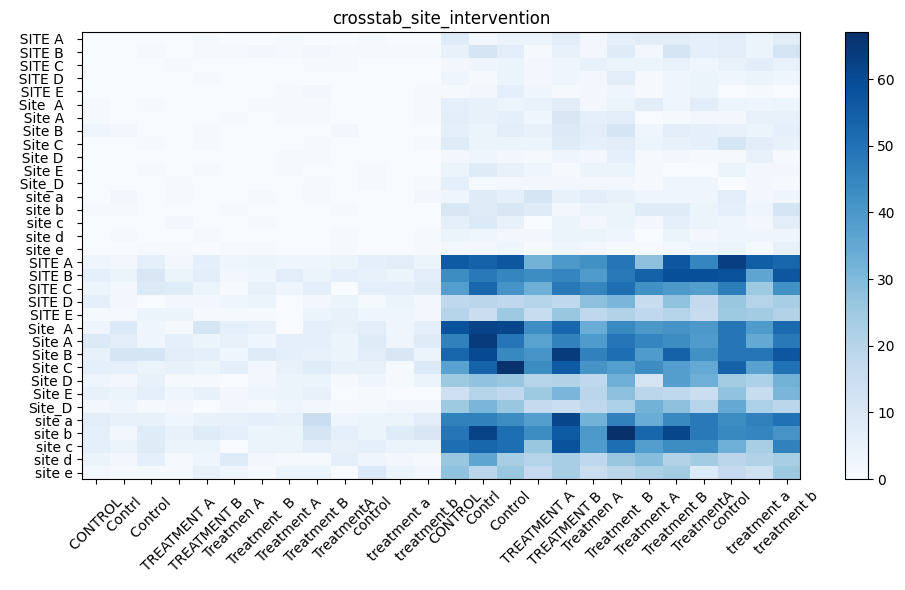

In [118]:
plot_crosstab(crosstab_site_intervention, "crosstab_site_intervention", figsize=(10, 6))

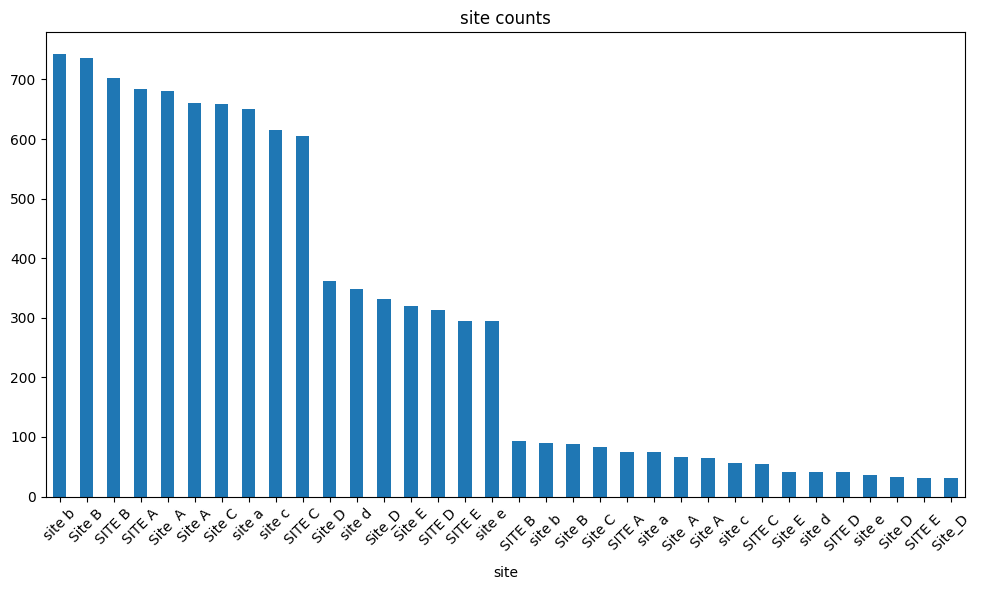

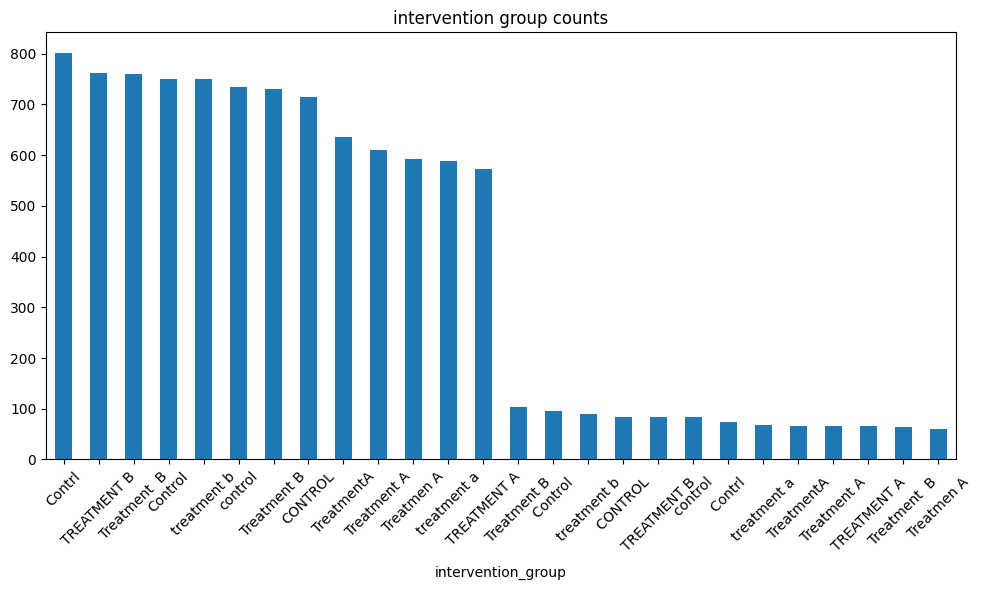

In [121]:
plot_value_counts(site_counts, "site counts", figsize=(10, 6))
plot_value_counts(intervention_group_counts, "intervention group counts", figsize=(10, 6))


## Summary

Write 2-3 sentences about what you learned from exploring this dataset.

**Your summary here:**
This data set has some missing values that need to be cared later. The patient in the data set is most older than 65 years old. The values of categorical variables contain many similar variantion that needed to be cleaned, like "SITE B" and "SITE b".